# Breast Cancer classification using NN

Breast cancer wisconsin (diagnostic) dataset

Data Set Characteristics:

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [299]:
df = pd.read_csv('./DATA/cancer_classification.csv')

Exploratory data analysis

In [302]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

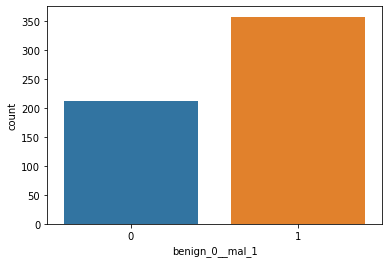

In [303]:
# Visualization
# See the balance between benign and malign cancer
sns.countplot(x='benign_0__mal_1', data=df)

<AxesSubplot:>

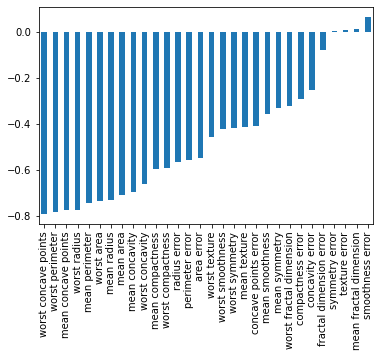

In [308]:
# Correlation between features
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

We get highly negative correlation values

<AxesSubplot:>

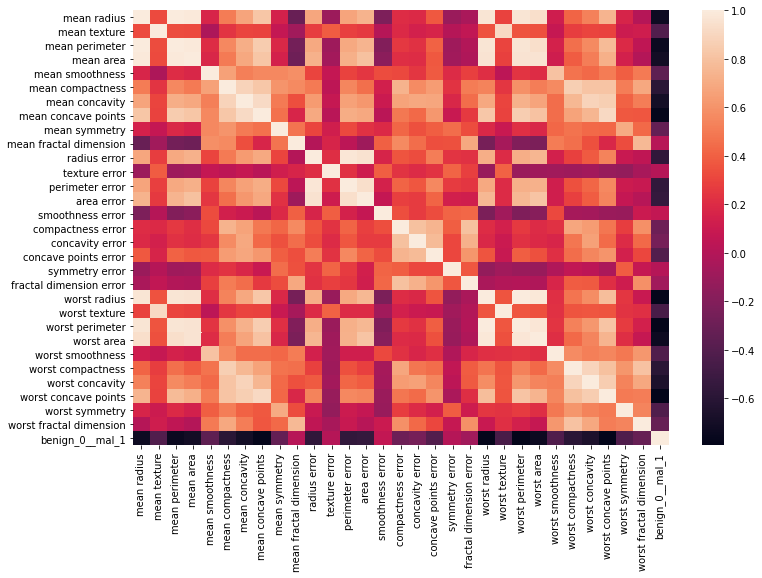

In [312]:
# Heatmap for correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

## Split the data

In [313]:
# Select features and label
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [314]:
from sklearn.model_selection import train_test_split

In [315]:
# Split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

## Scale the data

In [316]:
from sklearn.preprocessing import MinMaxScaler

In [317]:
scaler = MinMaxScaler()

In [318]:
scaler.fit(X_train)

MinMaxScaler()

In [319]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Formulate the model

In [320]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [321]:
X_train.shape

(426, 30)

In [322]:
model = Sequential()

# 
model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))

# The activation is sigmoid because we have a classification problem
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [323]:
# Train the model
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6741 - val_loss: 0.6563
Epoch 2/600
426/426 [==============================] - 0s 172us/sample - loss: 0.6349 - val_loss: 0.6193
Epoch 3/600
426/426 [==============================] - 0s 185us/sample - loss: 0.5960 - val_loss: 0.5806
Epoch 4/600
426/426 [==============================] - 0s 192us/sample - loss: 0.5593 - val_loss: 0.5478
Epoch 5/600
426/426 [==============================] - 0s 193us/sample - loss: 0.5227 - val_loss: 0.5091
Epoch 6/600
426/426 [==============================] - 0s 193us/sample - loss: 0.4807 - val_loss: 0.4685
Epoch 7/600
426/426 [==============================] - 0s 195us/sample - loss: 0.4411 - val_loss: 0.4220
Epoch 8/600
426/426 [==============================] - 0s 186us/sample - loss: 0.3960 - val_loss: 0.3752
Epoch 9/600
426/426 [==============================] - 0s 177us/sample - loss: 0.3475 - val_loss: 0.3238
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 272us/sample - loss: 0.0516 - val_loss: 0.1262
Epoch 79/600
426/426 [==============================] - 0s 187us/sample - loss: 0.0515 - val_loss: 0.1239
Epoch 80/600
426/426 [==============================] - 0s 180us/sample - loss: 0.0489 - val_loss: 0.1315
Epoch 81/600
426/426 [==============================] - 0s 175us/sample - loss: 0.0512 - val_loss: 0.1304
Epoch 82/600
426/426 [==============================] - 0s 187us/sample - loss: 0.0494 - val_loss: 0.1303
Epoch 83/600
426/426 [==============================] - 0s 187us/sample - loss: 0.0527 - val_loss: 0.1324
Epoch 84/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0517 - val_loss: 0.1276
Epoch 85/600
426/426 [==============================] - 0s 158us/sample - loss: 0.0500 - val_loss: 0.1281
Epoch 86/600
426/426 [==============================] - 0s 956us/sample - loss: 0.0498 - val_loss: 0.1336
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0359 - val_loss: 0.1461
Epoch 156/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0354 - val_loss: 0.1474
Epoch 157/600
426/426 [==============================] - 0s 179us/sample - loss: 0.0356 - val_loss: 0.1501
Epoch 158/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0352 - val_loss: 0.1501
Epoch 159/600
426/426 [==============================] - 0s 154us/sample - loss: 0.0369 - val_loss: 0.1490
Epoch 160/600
426/426 [==============================] - 0s 156us/sample - loss: 0.0374 - val_loss: 0.1526
Epoch 161/600
426/426 [==============================] - 0s 156us/sample - loss: 0.0353 - val_loss: 0.1491
Epoch 162/600
426/426 [==============================] - 0s 153us/sample - loss: 0.0352 - val_loss: 0.1498
Epoch 163/600
426/426 [==============================] - 0s 156us/sample - loss: 0.0344 - val_loss: 0.1508
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 168us/sample - loss: 0.0285 - val_loss: 0.1787
Epoch 232/600
426/426 [==============================] - 0s 175us/sample - loss: 0.0236 - val_loss: 0.1552
Epoch 233/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0257 - val_loss: 0.1667
Epoch 234/600
426/426 [==============================] - 0s 181us/sample - loss: 0.0236 - val_loss: 0.1599
Epoch 235/600
426/426 [==============================] - 0s 195us/sample - loss: 0.0247 - val_loss: 0.1703
Epoch 236/600
426/426 [==============================] - 0s 243us/sample - loss: 0.0232 - val_loss: 0.1599
Epoch 237/600
426/426 [==============================] - 0s 225us/sample - loss: 0.0287 - val_loss: 0.1933
Epoch 238/600
426/426 [==============================] - 0s 201us/sample - loss: 0.0244 - val_loss: 0.1564
Epoch 239/600
426/426 [==============================] - 0s 198us/sample - loss: 0.0246 - val_loss: 0.1651
Epoch 240/600
426/426 [============================

426/426 [==============================] - 0s 175us/sample - loss: 0.0154 - val_loss: 0.1960
Epoch 308/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0153 - val_loss: 0.1895
Epoch 309/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0154 - val_loss: 0.1887
Epoch 310/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0146 - val_loss: 0.1884
Epoch 311/600
426/426 [==============================] - 0s 153us/sample - loss: 0.0156 - val_loss: 0.1881
Epoch 312/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0163 - val_loss: 0.1997
Epoch 313/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0156 - val_loss: 0.1907
Epoch 314/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0145 - val_loss: 0.1940
Epoch 315/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0149 - val_loss: 0.1926
Epoch 316/600
426/426 [============================

426/426 [==============================] - 0s 158us/sample - loss: 0.0085 - val_loss: 0.2130
Epoch 384/600
426/426 [==============================] - 0s 158us/sample - loss: 0.0114 - val_loss: 0.2285
Epoch 385/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0075 - val_loss: 0.2128
Epoch 386/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0099 - val_loss: 0.2277
Epoch 387/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0078 - val_loss: 0.2213
Epoch 388/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0075 - val_loss: 0.2260
Epoch 389/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0078 - val_loss: 0.2235
Epoch 390/600
426/426 [==============================] - 0s 158us/sample - loss: 0.0075 - val_loss: 0.2290
Epoch 391/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0080 - val_loss: 0.2096
Epoch 392/600
426/426 [============================

426/426 [==============================] - 0s 170us/sample - loss: 0.0044 - val_loss: 0.2368
Epoch 460/600
426/426 [==============================] - 0s 194us/sample - loss: 0.0041 - val_loss: 0.2389
Epoch 461/600
426/426 [==============================] - 0s 175us/sample - loss: 0.0043 - val_loss: 0.2422
Epoch 462/600
426/426 [==============================] - 0s 171us/sample - loss: 0.0040 - val_loss: 0.2397
Epoch 463/600
426/426 [==============================] - 0s 165us/sample - loss: 0.0051 - val_loss: 0.2586
Epoch 464/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0040 - val_loss: 0.2369
Epoch 465/600
426/426 [==============================] - 0s 171us/sample - loss: 0.0042 - val_loss: 0.2443
Epoch 466/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0041 - val_loss: 0.2378
Epoch 467/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0042 - val_loss: 0.2521
Epoch 468/600
426/426 [============================

426/426 [==============================] - 0s 168us/sample - loss: 0.0042 - val_loss: 0.2635
Epoch 536/600
426/426 [==============================] - 0s 174us/sample - loss: 0.0029 - val_loss: 0.2957
Epoch 537/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0022 - val_loss: 0.2669
Epoch 538/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0024 - val_loss: 0.2745
Epoch 539/600
426/426 [==============================] - 0s 149us/sample - loss: 0.0024 - val_loss: 0.2697
Epoch 540/600
426/426 [==============================] - 0s 179us/sample - loss: 0.0027 - val_loss: 0.2801
Epoch 541/600
426/426 [==============================] - 0s 235us/sample - loss: 0.0023 - val_loss: 0.2734
Epoch 542/600
426/426 [==============================] - 0s 207us/sample - loss: 0.0022 - val_loss: 0.2797
Epoch 543/600
426/426 [==============================] - 0s 217us/sample - loss: 0.0023 - val_loss: 0.2748
Epoch 544/600
426/426 [============================

In [324]:
# Losses
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

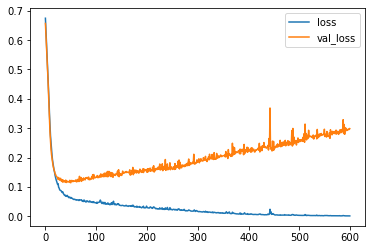

In [325]:
model_loss.plot()

# We have losses. this means over-fitting 

# Using early stopping

In [326]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [327]:
# Using callbacks
from tensorflow.keras.callbacks import EarlyStopping
# Stop training when a monitored quantity has stopped improving.

In [328]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [329]:
# Train again using the early_stop method when val_loss stops decreasing
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6743 - val_loss: 0.6570
Epoch 2/600
426/426 [==============================] - 0s 179us/sample - loss: 0.6517 - val_loss: 0.6328
Epoch 3/600
426/426 [==============================] - 0s 183us/sample - loss: 0.6222 - val_loss: 0.5961
Epoch 4/600
426/426 [==============================] - 0s 180us/sample - loss: 0.5738 - val_loss: 0.5395
Epoch 5/600
426/426 [==============================] - 0s 183us/sample - loss: 0.5203 - val_loss: 0.4873
Epoch 6/600
426/426 [==============================] - 0s 199us/sample - loss: 0.4693 - val_loss: 0.4396
Epoch 7/600
426/426 [==============================] - 0s 184us/sample - loss: 0.4245 - val_loss: 0.3923
Epoch 8/600
426/426 [==============================] - 0s 181us/sample - loss: 0.3803 - val_loss: 0.3519
Epoch 9/600
426/426 [==============================] - 0s 190us/sample - loss: 0.3432 - val_loss: 0.3156
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0559 - val_loss: 0.1214
Epoch 79/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0539 - val_loss: 0.1278
Epoch 80/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0541 - val_loss: 0.1234
Epoch 81/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0527 - val_loss: 0.1237
Epoch 82/600
426/426 [==============================] - 0s 156us/sample - loss: 0.0531 - val_loss: 0.1256
Epoch 83/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0521 - val_loss: 0.1292
Epoch 84/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0691 - val_loss: 0.1231
Epoch 85/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0560 - val_loss: 0.1139
Epoch 86/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0517 - val_loss: 0.1379
Epoch 87/600
426/426 [========================

<AxesSubplot:>

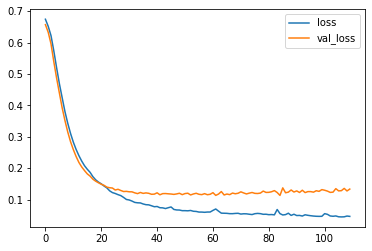

In [330]:
# The new losses show improvement
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Adding in DropOut Layers to improve performance

In [331]:
from tensorflow.keras.layers import Dropout

In [332]:
model = Sequential()

# Use the dropout to turnoff a percentage of the neuron networks randomly
# to prevent over-fitting. 0.5 means that half of the neurons in this layer
# are turned of on every batch
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [333]:
# Train again
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.7097 - val_loss: 0.6901
Epoch 2/600
426/426 [==============================] - 0s 189us/sample - loss: 0.6861 - val_loss: 0.6705
Epoch 3/600
426/426 [==============================] - 0s 189us/sample - loss: 0.6806 - val_loss: 0.6523
Epoch 4/600
426/426 [==============================] - 0s 186us/sample - loss: 0.6611 - val_loss: 0.6371
Epoch 5/600
426/426 [==============================] - 0s 189us/sample - loss: 0.6522 - val_loss: 0.6185
Epoch 6/600
426/426 [==============================] - 0s 206us/sample - loss: 0.6205 - val_loss: 0.5937
Epoch 7/600
426/426 [==============================] - 0s 191us/sample - loss: 0.5940 - val_loss: 0.5683
Epoch 8/600
426/426 [==============================] - 0s 203us/sample - loss: 0.5818 - val_loss: 0.5417
Epoch 9/600
426/426 [==============================] - 0s 208us/sample - loss: 0.5619 - val_loss: 0.5142
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 175us/sample - loss: 0.1410 - val_loss: 0.0949
Epoch 79/600
426/426 [==============================] - 0s 176us/sample - loss: 0.1362 - val_loss: 0.1392
Epoch 80/600
426/426 [==============================] - 0s 175us/sample - loss: 0.1135 - val_loss: 0.1171
Epoch 81/600
426/426 [==============================] - 0s 169us/sample - loss: 0.1233 - val_loss: 0.1011
Epoch 82/600
426/426 [==============================] - 0s 176us/sample - loss: 0.1123 - val_loss: 0.1005
Epoch 83/600
426/426 [==============================] - 0s 177us/sample - loss: 0.1051 - val_loss: 0.1094
Epoch 84/600
426/426 [==============================] - 0s 166us/sample - loss: 0.1036 - val_loss: 0.0983
Epoch 85/600
426/426 [==============================] - 0s 173us/sample - loss: 0.1177 - val_loss: 0.1075
Epoch 86/600
426/426 [==============================] - 0s 182us/sample - loss: 0.1164 - val_loss: 0.0988
Epoch 87/600
426/426 [========================

<AxesSubplot:>

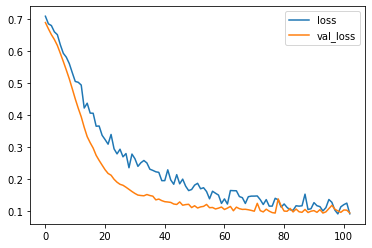

In [334]:
# Check losses again
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
# The behavior has improved

# Model Evaluation

In [336]:
# Perform the prediction
predictions = model.predict_classes(X_test)

In [337]:
from sklearn.metrics import classification_report,confusion_matrix

In [338]:
# 
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [339]:
# the network just misclassified one element.
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
